<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [ ]:
%pwd

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
import re

def remove_date(doc):
    pattern=r"[ ](0?[1-9]|1[0-2])/(0?[1-9]|1[0-9]|2[0-9]|3[01])/\d{4}[ ]"
    result = re.sub(pattern, '', doc)
    return result


def remove_star_rating(doc):
    return int(float(doc.split('star rating')[0][1:4]))


def remove_checkin(token_list):
    if token_list[1] in ["check-in", "check-ins"]:
        token_list = token_list[2:]
    return token_list


shops['full_review_text'] = shops['full_review_text'].apply(remove_date)

In [3]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0 star rating
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0 star rating
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0 star rating
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0 star rating
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0 star rating


In [4]:
shops['rating'] = shops['star_rating'].apply(remove_star_rating)
shops.head()

,coffee_shop_name,full_review_text,star_rating,rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0 star rating,5
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0 star rating,4
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0 star rating,4
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0 star rating,2
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0 star rating,4


In [5]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [6]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [7]:
shops['tokens'] = shops['tokens'].apply(remove_checkin)
shops.head()

,coffee_shop_name,full_review_text,star_rating,rating,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0 star rating,5,"[Love, love, loved, the, atmosphere!, Every, c..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0 star rating,4,"[Listed, in, Date, Night:, Austin,, Ambiance, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0 star rating,4,"[Listed, in, Brunch, Spots, I, loved, the, ecl..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0 star rating,2,"[Very, cool, decor!, Good, drinks, Nice, seati..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0 star rating,4,"[They, are, located, within, the, Northcross, ..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [8]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 27779),
 ('and', 25748),
 ('a', 22085),
 ('I', 19776),
 ('to', 16904),
 (' ', 14989),
 ('of', 12495),
 ('is', 11748),
 ('was', 9539),
 ('in', 8901)]

In [9]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [10]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
52,the,6520,27779,1.0,0.035252,0.035252,0.856092
1,and,6804,25748,2.0,0.032675,0.067927,0.893382
47,a,6181,22085,3.0,0.028026,0.095953,0.811581
40,I,5468,19776,4.0,0.025096,0.121049,0.717962
71,to,5631,16904,5.0,0.021452,0.142501,0.739364


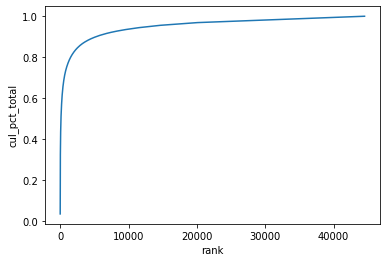

In [11]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

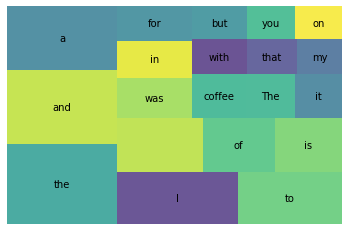

In [14]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [15]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    doc_tokens = remove_checkin(doc_tokens)
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [16]:
shops['tokens'].head()

0    [love, love, loved, atmosphere!, corner, coffe...
1    [listed, date, night:, austin,, ambiance, aust...
2    [listed, brunch, spots, loved, eclectic, homey...
3    [cool, decor!, good, drinks, nice, seating,  ,...
4    [located, northcross, mall, shopping, center, ...
Name: tokens, dtype: object

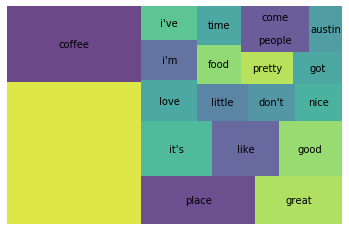

In [17]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [18]:
STOP_WORDS = nlp.Defaults.stop_words.union(["", " ", "coffee", "place", "it's", "i'm", "i've", "austin", "list"])

In [19]:
def get_lemmas(text):
    
    lemmas = []
    doc = nlp(text)
    
    for token in doc:
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
            
    if lemmas[1] == "check":
        lemmas = lemmas[2:]
    
    return lemmas

In [20]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [21]:
shops['lemmas'].head()

0    [love, love, love, atmosphere, corner, shop, s...
1    [list, Date, Night, Ambiance, beautiful, love,...
2    [list, Brunch, Spots, love, eclectic, homey, p...
3    [cool, decor, good, drink, nice, seating, over...
4    [locate, Northcross, mall, shopping, center, f...
Name: lemmas, dtype: object

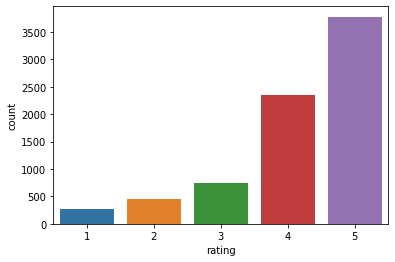

In [26]:
sns.countplot(shops['rating']);

In [28]:
shops['rating'].value_counts(normalize=True)

5    0.496324
4    0.309874
3    0.096901
2    0.060399
1    0.036502
Name: rating, dtype: float64

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [29]:
def good_or_bad(rating):
    if rating >= 4:
        return 'good'
    else:
        return 'bad'

shops['cat_rating'] = shops['rating'].apply(good_or_bad)
shops['is_good'] = (shops['cat_rating'] == 'good')

In [30]:
shops['rating'] = shops['rating'].apply(int)

In [32]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,rating,tokens,lemmas,cat_rating,is_good
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0 star rating,5,"[love, love, loved, atmosphere!, corner, coffe...","[love, love, love, atmosphere, corner, shop, s...",good,True
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0 star rating,4,"[listed, date, night:, austin,, ambiance, aust...","[list, Date, Night, Ambiance, beautiful, love,...",good,True
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0 star rating,4,"[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p...",good,True
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0 star rating,2,"[cool, decor!, good, drinks, nice, seating, ,...","[cool, decor, good, drink, nice, seating, over...",bad,False
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0 star rating,4,"[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f...",good,True


In [51]:
def count_good_bad(df):
        
        docs = df['lemmas']
        
        word_counts_good = Counter()
        word_counts_bad = Counter()
        appears_in_good = Counter()
        appears_in_bad = Counter()
        
        total_docs = len(docs)

        for i, doc in enumerate(docs):
            if df['is_good'][i]:
                word_counts_good.update(doc)
                appears_in_good.update(set(doc))
            else:
                word_counts_bad.update(doc)
                appears_in_bad.update(doc)

        t1_good = zip(word_counts_good.keys(), word_counts_good.values())
        wc_good = pd.DataFrame(t1_good, columns = ['word', 'count_good'])
        t1_bad = zip(word_counts_bad.keys(), word_counts_bad.values())
        wc_bad = pd.DataFrame(t1_bad, columns = ['word', 'count_bad'])
        
        wc_good['rank_good'] = wc_good['count_good'].rank(method='first', ascending=False)
        wc_bad['rank_bad'] = wc_bad['count_bad'].rank(method='first', ascending=False)
        
        total_good = wc_good['count_good'].sum()
        total_bad = wc_bad['count_bad'].sum()

        wc_good['pct_total'] = wc_good['count_good'].apply(lambda x: x / total_docs)
        wc_bad['pct_total'] = wc_bad['count_bad'].apply(lambda x: x / total_docs)
        
        """
        wc_good = wc_good.sort_values(by='rank_good')
        wc_bad = wc_bad.sort_values(by='rank_bad')
        wc_good['cul_pct_total_good'] = wc_good['pct_total_good'].cumsum()
        wc_bad['cul_pct_total_bad'] = wc_bad['pct_total_bad'].cumsum()
        """

        t2_good = zip(appears_in_good.keys(), appears_in_good.values())
        t2_bad = zip(appears_in_bad.keys(), appears_in_bad.values())
        ac_good = pd.DataFrame(t2_good, columns=['word', 'appears_in_good'])
        ac_bad = pd.DataFrame(t2_bad, columns=['word', 'appears_in_bad'])
        wc_good = ac_good.merge(wc_good, on='word')
        wc_bad = ac_bad.merge(wc_bad, on='word')

        wc_good['appears_in_pct_good'] = wc_good['appears_in_good'].apply(lambda x: x / total_docs)
        wc_bad['appears_in_pct_bad'] = wc_bad['appears_in_bad'].apply(lambda x: x / total_docs)
        
        wc = wc_good.merge(wc_bad, on='word')
        
        return wc.sort_values(by='rank_good')

In [52]:
wc = count_good_bad(shops)

In [53]:
wc.head()

,word,appears_in_good,count_good,rank_good,pct_total_x,appears_in_pct_good,appears_in_bad,count_bad,rank_bad,pct_total_y,appears_in_pct_bad
167,good,2946,4398,1.0,0.577468,0.386817,996,996,1.0,0.130777,0.130777
72,great,2497,3459,2.0,0.454175,0.327862,465,465,8.0,0.061056,0.061056
157,like,1677,2434,3.0,0.319590,0.220194,945,945,2.0,0.124081,0.124081
0,love,1589,2087,4.0,0.274028,0.208640,249,249,35.0,0.032694,0.032694
337,come,1479,1985,5.0,0.260636,0.194196,651,651,4.0,0.085478,0.085478


In [54]:
wc['difference'] = wc['appears_in_pct_good'] - wc['appears_in_pct_bad']
wc = wc.sort_values(by='difference')
wc.head()

,word,appears_in_good,count_good,rank_good,pct_total_x,appears_in_pct_good,appears_in_bad,count_bad,rank_bad,pct_total_y,appears_in_pct_bad,difference
1227,rude,19,19,1735.0,0.002495,0.002495,123,123,108.0,0.016150,0.016150,-0.013655
917,ok,117,122,401.0,0.016019,0.015362,157,157,75.0,0.020614,0.020614,-0.005252
2010,horrible,11,11,2469.0,0.001444,0.001444,49,49,298.0,0.006434,0.006434,-0.004989
1321,attitude,35,36,1102.0,0.004727,0.004596,69,69,216.0,0.009060,0.009060,-0.004464
1681,mediocre,16,16,1952.0,0.002101,0.002101,49,49,296.0,0.006434,0.006434,-0.004333


In [56]:
cols = ['word', 'appears_in_pct_good', 'appears_in_pct_bad', 'difference']
wc[cols].head(10)

,word,appears_in_pct_good,appears_in_pct_bad,difference
1227,rude,0.002495,0.016150,-0.013655
917,ok,0.015362,0.020614,-0.005252
2010,horrible,0.001444,0.006434,-0.004989
1321,attitude,0.004596,0.009060,-0.004464
1681,mediocre,0.002101,0.006434,-0.004333
3033,meh,0.001838,0.006040,-0.004202
950,tip,0.008009,0.011686,-0.003676
1161,rating,0.002495,0.006040,-0.003545
1299,disappointing,0.002232,0.005646,-0.003414
1202,poor,0.002757,0.005646,-0.002889


In [70]:
wc_reverse = wc.sort_values(by='difference', ascending=False)
wc_reverse.head()

,word,appears_in_good,count_good,rank_good,pct_total_x,appears_in_pct_good,appears_in_bad,count_bad,rank_bad,pct_total_y,appears_in_pct_bad,difference
72,great,2497,3459,2.0,0.454175,0.327862,465,465,8.0,0.061056,0.061056,0.266807
167,good,2946,4398,1.0,0.577468,0.386817,996,996,1.0,0.130777,0.130777,0.256040
0,love,1589,2087,4.0,0.274028,0.208640,249,249,35.0,0.032694,0.032694,0.175945
133,friendly,1439,1514,11.0,0.198792,0.188944,209,209,50.0,0.027442,0.027442,0.161502
541,delicious,1154,1281,17.0,0.168199,0.151523,89,89,158.0,0.011686,0.011686,0.139837


In [64]:
wc_top10 = wc_reverse[:10]
wc_bot10 = wc[:10]

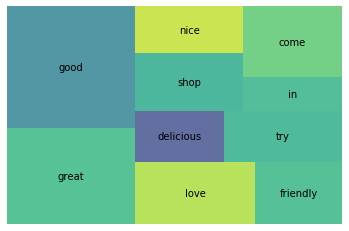

In [72]:
squarify.plot(sizes=wc_top10['pct_total_x'], label=wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

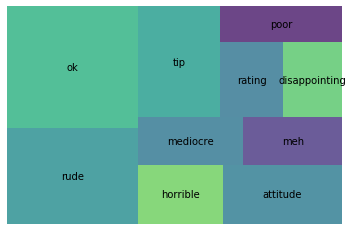

In [71]:
squarify.plot(sizes=wc_bot10['pct_total_y'], label=wc_bot10['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 



In [1]:
import requests
import bs4
from bs4 import BeautifulSoup

import pandas as pd
import time

In [2]:
url = "https://www.indeed.com/jobs?q=Data+Scientist+%2420%2C000&l=Los+Angeles"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
# print(soup.prettify())

In [3]:
def extract_job_title_from_result(soup):
    jobs = []
    for div in soup.find_all(name='div', attrs={'class': 'row'}):
        for a in div.find_all(name='a', attrs={'data-tn-element': 'jobTitle'}):
            jobs.append(a['title'])
                
    return jobs

extract_job_title_from_result(soup)

['Data Scientist, Workforce Analytics',
 'Data Scientist',
 'Senior Data Scientist',
 'Principal Data Scientist',
 'Sr. Data Scientist, Predictive Analysis',
 'Data Scientist',
 'Forward Deployed Data Scientist (Client Facing)',
 'Sr. Data Scientist, Media Mix Modeling',
 'Data Scientist',
 'Principal Data Scientist, Media Mix Modeling']

In [4]:
def extract_company_from_result(soup):
    companies = []
    for div in soup.find_all(name='div', attrs={'class': 'row'}):
        company = div.find_all(name='span', attrs={'class': 'company'})
        if len(company) > 0:
            for c in company:
                companies.append(c.text.strip())
        else:
            sec_try = div.find_all(name='span', attrs={'class': 'result-link-source'})
            for span in sec_try:
                companies.append(span.text.strip())
                
    return companies

extract_company_from_result(soup)

['Warner Bros. Entertainment Group',
 'HBO Max',
 'Intuit',
 'HBO Max',
 'HBO Max',
 "Children's Hospital Los Angeles",
 'Retina AI',
 'HBO Max',
 'Quibi - Los Angeles',
 'HBO Max']

In [5]:
def extract_location_from_result(soup):
    locations = []
    spans = soup.find_all('span', attrs={'class': 'location'})
    for span in spans:
        locations.append(span.text)
    return locations

extract_location_from_result(soup)

['Burbank, CA',
 'Burbank, CA',
 'Los Angeles, CA 90071',
 'Burbank, CA',
 'Burbank, CA',
 'Glendale, CA',
 'Santa Monica, CA',
 'Burbank, CA',
 'Los Angeles, CA',
 'Burbank, CA']

In [6]:
def extract_salary_from_result(soup):
    salaries = []
    for div in soup.find_all(name='div', attrs={'class': 'row'}):
        salary = div.find_all(name='span', attrs={'class': 'salaryText'})
        if len(salary) > 0:
            for s in salary:
                salaries.append(s.text.strip())
        else:
            salaries.append('Nothing found')
                
    return salaries

extract_salary_from_result(soup)

['Nothing found',
 'Nothing found',
 'Nothing found',
 'Nothing found',
 'Nothing found',
 'Nothing found',
 'Nothing found',
 'Nothing found',
 'Nothing found',
 'Nothing found']

In [7]:
def extract_summary_from_result(soup):
    summaries = []
    divs = soup.find_all('div', attrs={'class': 'summary'})
    for div in divs:
        if len(div) > 1:
            summary = []
            lines = div.find_all('li')
            for line in lines:
                summary.append(line.text.strip())
            summaries.append(summary)
        else:
            summaries.append(div.text.strip())
    
    return summaries

extract_summary_from_result(soup)

['Company Overview WarnerMedia is a leading media and entertainment company that creates and distributes premium and popular content from a diverse array of…',
 ['The Data Scientist will be responsible for leveraging data analytics, visualization and data science to help driving growth and improving retention for our new…'],
 ['Intuit is looking for innovative and hands-on data scientists to focus on Smart Money Services.',
  'Our team leverages data mining/machine learning techniques to…'],
 ['This role will support the HBO Max product, marketing and content teams understand what makes our customers tick and how to target new ones.'],
 ['The Senior Data Scientist will be responsible for leveraging data analytics, visualization and data science to help driving growth and improving retention for…'],
 ['The Data Scientist conducts research in medical applications of data science by applying techniques and models from machine learning and computational…'],
 ['This role requires a balance 

In [8]:
max_results_per_city = 100

cities = ['Los+Angeles', 'San+Francisco', 'Washington+DC']
columns = ['city', 'job_title', 'company_name', 'location', 'summary', 'salary']

df = pd.DataFrame(columns=columns)
df

,city,job_title,company_name,location,summary,salary


In [19]:
for city in cities:
    for start in range(0, max_results_per_city, 10):
        page = requests.get('http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=' + str(city) + '&start=' + str(start))
        time.sleep(1)
        soup = BeautifulSoup(page.text, 'html.parser')
        for div in soup.find_all(name='div', attrs={'class': 'row'}):
            num = len(df) + 1
            job_post = []
            job_post.append(city)
            
            # Add the job title
            for a in div.find_all(name='a', attrs={'data-tn-element': 'jobTitle'}):
                job_post.append(a['title'])
                
            # Add the company name
            company = div.find_all(name='span', attrs={'class': 'company'})
            if len(company) > 0:
                for c in company:
                    job_post.append(c.text.strip())
            else:
                sec_try = div.find_all(name='span', attrs={'class': 'result-link-source'})
                for span in sec_try:
                    job_post.append(span.text)
                    
            # Add the location
            c = div.find_all('span', attrs={'class': 'location'})
            for span in c:
                job_post.append(span.text)
                
            # Add the job summary
            divs = soup.find_all('div', attrs={'class': 'summary'})
            for div in divs:
                if len(div) > 1:
                    summary = []
                    lines = div.find_all('li')
                    if len(lines) == 1:
                        for line in lines:
                            job_post.append(line.text.strip())
                    else:
                        for line in lines:
                            summary.append(line.text.strip())
                        job_post.append(' '.join(summary))
                else:
                    job_post.append(div.text.strip())
                    
            # Add the salary
            salary = div.find_all(name='span', attrs={'class': 'salaryText'})
            if len(salary) > 0:
                for s in salary:
                    job_post.append(s.text.strip())
            else:
                job_post.append('Nothing found')
                
            print(job_post)
                
            df.loc[num] = job_post

['Los+Angeles', 'Data Scientist, Workforce Analytics', 'Warner Bros. Entertainment Group', 'Burbank, CA', 'Company Overview WarnerMedia is a leading media and entertainment company that creates and distributes premium and popular content from a diverse array of…', 'Build the Future of Entertainment. HBO Max is WarnerMedia’s direct-to-consumer (DTC) offering debuting in May 2020. Paid time off every year to volunteer.', 'Intuit is looking for innovative and hands-on data scientists to focus on Smart Money Services. Our team leverages data mining/machine learning techniques to…', 'Build the Future of Entertainment. HBO Max is WarnerMedia’s direct-to-consumer (DTC) offering debuting in May 2020. Strong presentation skills are a must.', 'The Data Scientist conducts research in medical applications of data science by applying techniques and models from machine learning and computational…', 'Build the Future of Entertainment. HBO Max is WarnerMedia’s direct-to-consumer (DTC) offering debutin

ValueError: cannot set a row with mismatched columns

In [20]:
job_post

['Los+Angeles',
 'Data Scientist, Workforce Analytics',
 'Warner Bros. Entertainment Group',
 'Burbank, CA',
 'Company Overview WarnerMedia is a leading media and entertainment company that creates and distributes premium and popular content from a diverse array of…',
 'Build the Future of Entertainment. HBO Max is WarnerMedia’s direct-to-consumer (DTC) offering debuting in May 2020. Paid time off every year to volunteer.',
 'Intuit is looking for innovative and hands-on data scientists to focus on Smart Money Services. Our team leverages data mining/machine learning techniques to…',
 'Build the Future of Entertainment. HBO Max is WarnerMedia’s direct-to-consumer (DTC) offering debuting in May 2020. Strong presentation skills are a must.',
 'The Data Scientist conducts research in medical applications of data science by applying techniques and models from machine learning and computational…',
 'Build the Future of Entertainment. HBO Max is WarnerMedia’s direct-to-consumer (DTC) offerin

In [16]:
summary

['Build the Future of Entertainment.',
 'HBO Max is WarnerMedia’s direct-to-consumer (DTC) offering debuting in May 2020.',
 'Strong presentation skills are a must.']

In [17]:
' '.join(summary)

'Build the Future of Entertainment. HBO Max is WarnerMedia’s direct-to-consumer (DTC) offering debuting in May 2020. Strong presentation skills are a must.'